## Observations and Insights 

In [ ]:
#My Observations & Insights

"""
1. There was a very strong positive correlation between mouse weight and tumor volume (r = 0.84);
thus, indicating that as a mouse's weight increases there is a strong likelihood its tumor volume will increase.
71% of the variation in tumor volume could be explained by weight gain.

2. For mice treated with Capomulin, although there was a slight increase in average tumor volume over the first 20 days,
there was a net decrease in average tumor volume over the entire time period, thus indicating the treatment was effective.

3. Mouses treated with Capomulin (M = 40.68) and Ramicane (M = 40.22) had the lowest tumor volumes by a wide margin.
The means for other treatments ranged from 52.32 to 55.24.

4. The standard error of mean tumor volume for each treatment group was low, indicating that the sample mean for each group
was likely a good approximation of the population mean. The standard errors for Capomulin (Standard Error = 0.33) and
Ramicane (Standard Error = 0.32) were lower than any other treatment groups.
"""

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
d = pd.merge(mouse_metadata, study_results)
d.rename(columns={'Mouse ID': 'id', 'Drug Regimen': 'drug', 'Sex': 'sex', 'Age_months':\
'age', 'Weight (g)': 'grams', 'Timepoint': 't', 'Tumor Volume (mm3)': 'Tvolume', 'Metastatic Sites': 'msites'}, inplace=True)
# Display the data table for preview
d

,id,drug,sex,age,grams,t,Tvolume,msites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
print(f'There are {d.id.nunique()} mice in the raw data set.')

There are 249 mice in the raw data set.


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
problem_mice = [] #list of mice with more than one timepoint.
for id in d.id: #Looping thru mice in data series
    unique_timepoints = []
    for timepoint in d[d.id == id].loc[:, 't']: #Looping thru time points for each mouse
        if timepoint not in unique_timepoints:
            unique_timepoints.append(timepoint)
        else:
            if id not in problem_mice: 
                problem_mice.append(id)
problem_mice

['g989']

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
problem_data = pd.DataFrame(d).reset_index()
problem_data.set_index('id', inplace=True)
problem_data.loc[problem_mice,:]

,index,drug,sex,age,grams,t,Tvolume,msites
id,,,,,,,,
g989,908,Propriva,Female,21,26,0,45.000000,0
g989,909,Propriva,Female,21,26,0,45.000000,0
g989,910,Propriva,Female,21,26,5,48.786801,0
g989,911,Propriva,Female,21,26,5,47.570392,0
g989,912,Propriva,Female,21,26,10,51.745156,0
g989,913,Propriva,Female,21,26,10,49.880528,0
g989,914,Propriva,Female,21,26,15,51.325852,1
g989,915,Propriva,Female,21,26,15,53.442020,0
g989,916,Propriva,Female,21,26,20,55.326122,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
good_mice = d.id.unique()
good_mice = list(good_mice)
for good_mouse in good_mice:
        if good_mouse in problem_mice:
            good_mice.remove(good_mouse)
cd = pd.DataFrame(problem_data.loc[good_mice,:]) #cd stands for "clean data"
cd.reset_index(inplace=True)
cd # clean data

,id,index,drug,sex,age,grams,t,Tvolume,msites
0,k403,0,Ramicane,Male,21,16,0,45.000000,0
1,k403,1,Ramicane,Male,21,16,5,38.825898,0
2,k403,2,Ramicane,Male,21,16,10,35.014271,1
3,k403,3,Ramicane,Male,21,16,15,34.223992,1
4,k403,4,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,z969,1888,Naftisol,Male,9,30,25,63.145652,2
1876,z969,1889,Naftisol,Male,9,30,30,65.841013,3
1877,z969,1890,Naftisol,Male,9,30,35,69.176246,4
1878,z969,1891,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
print(f'There are {cd.id.nunique()} mice in the new DataFrame.')

There are 248 mice in the new DataFrame.


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cds = cd.rename(columns={'drug': 'Drug Regimen'})
mean = cds.groupby('Drug Regimen').Tvolume.mean()
median = cds.groupby('Drug Regimen').Tvolume.median()
var = cds.groupby('Drug Regimen').Tvolume.var()
std = cds.groupby('Drug Regimen').Tvolume.std()
sem = cds.groupby('Drug Regimen').Tvolume.sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_table = pd.concat([mean, median, var, std, sem], axis=1)
summary_table.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

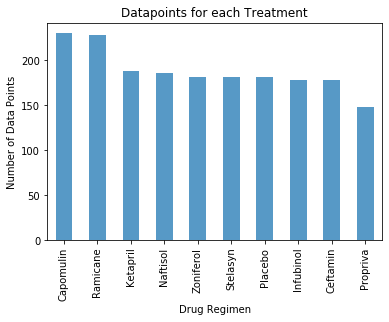

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas

mpt = cd.groupby('drug').id.count().sort_values(ascending=False)
mpt = mpt.plot(kind="bar", alpha=0.75, figsize=(6,4), title='Datapoints for each Treatment')

mpt.set_xlabel('Drug Regimen')
mpt.set_ylabel('Number of Data Points')

plt.savefig('../Images/Dps_by_treatment_pandas')
plt.show()


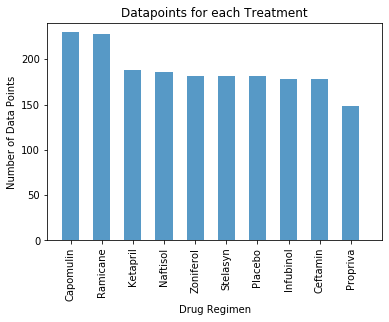

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mpt = cd.groupby('drug').id.count().sort_values(ascending=False)
x_axis = np.arange(len(mpt))
treatments = mpt.index.tolist()
tick_locations = [x for x in x_axis]
plt.figure(figsize=(6,4))
plt.bar(x_axis, mpt, alpha=0.75, align='center', width=0.55)
plt.xticks(tick_locations, treatments, rotation='vertical')
plt.xlim(-0.75,len(x_axis))
plt.ylim(0, max(mpt) + 10)
plt.title('Datapoints for each Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.savefig('../Images/Dps_by_treatment_plt')
plt.show()

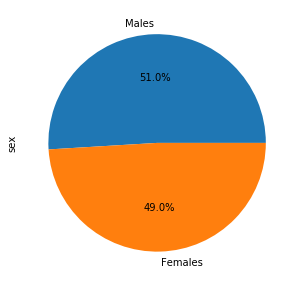

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
fvm = cd.sex.value_counts()
males, females = fvm[0], fvm[1]
fvm.plot.pie(figsize=(5, 5), autopct="%1.1f%%", labels=['Males', 'Females'])
plt.savefig('../Images/males_vs_females_pandas')

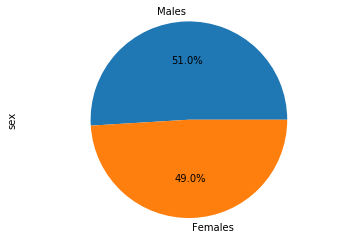

<Figure size 360x360 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie([males, females], autopct="%1.1f%%", labels=['Males', 'Females'])
plt.axis("equal")
plt.ylabel('sex')
plt.figure(figsize=(5,5))
plt.savefig('../Images/males_vs_females_plt')

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
cd.set_index(cd.drug, inplace=True)
cd = cd.loc[drugs]
g = cd.groupby('id').t.max().reset_index()
ltp = pd.merge(g, cd, left_on = ['id', 't'], right_on = ['id', 't'])
ltp.drop(columns=['index'], inplace=True)

In [15]:
t4_volz = {}
for drug in drugs:
    tvolz = []
    for i in range (len(ltp)):
        if ltp.drug[i] == drug:        
            tvolz.append(ltp.iloc[i, 6])
    t4_volz[drug] = tvolz 

ds = pd.DataFrame(t4_volz)

for drug in drugs:
    q = ds[drug].quantile([.25, .5, .75])
    print(drug.upper())
    print('\nQuartiles:')
    print(q)

    print('\nInterquartile Range:')
    iqr = q[0.75] - q[0.25]
    print(iqr)

    print('\nOutlier Boundaries:')
    lb = q[0.25] - (1.5*iqr)
    ub = q[0.75] + (1.5*iqr)
    print('Lower = ' + str(lb) + ';', 'Upper = ' + str(ub))

    outlier_values = []
    for vol in ds[drug]:
        if vol <= lb or vol >= ub:
            outlier_values.append(vol)

    print('\nOutlier Values:')
    if len(outlier_values) == 0:
        print('There are no outlier values.')
    elif len(outlier_values) == 1:
        print(f'There is {len(outlier_values)} outlier value.\nThe outlier value is:')
        print(outlier_values)       
    else:
        print(f'There are {len(outlier_values)} outlier values.\nThe outlier values are:')
        print(outlier_values)
    print()
    print()
    print()

CAPOMULIN

Quartiles:
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Capomulin, dtype: float64

Interquartile Range:
7.781863460000004

Outlier Boundaries:
Lower = 20.70456164999999; Upper = 51.83201549

Outlier Values:
There are no outlier values.



RAMICANE

Quartiles:
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Ramicane, dtype: float64

Interquartile Range:
9.098536719999998

Outlier Boundaries:
Lower = 17.912664470000003; Upper = 54.30681135

Outlier Values:
There are no outlier values.



INFUBINOL

Quartiles:
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Infubinol, dtype: float64

Interquartile Range:
11.477135160000003

Outlier Boundaries:
Lower = 36.83290494999999; Upper = 82.74144559000001

Outlier Values:
There is 1 outlier value.
The outlier value is:
[36.321345799999996]



CEFTAMIN

Quartiles:
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Ceftamin, dtype: float64

Interquartile Range:
15.577752179999997

Outlier Bou

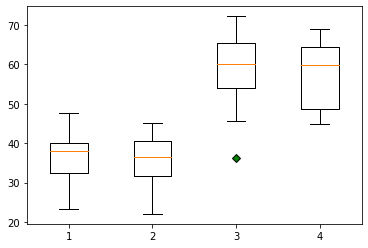

In [16]:
outliers = dict(markerfacecolor = "g", marker = "D")
figure, turtlez = plt.subplots()
plotz = [t4_volz['Capomulin'], t4_volz['Ramicane'], t4_volz['Infubinol'], t4_volz['Ceftamin']]
turtlez.boxplot(plotz, flierprops = outliers)
plt.savefig('../Images/males_vs_females_plt')

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

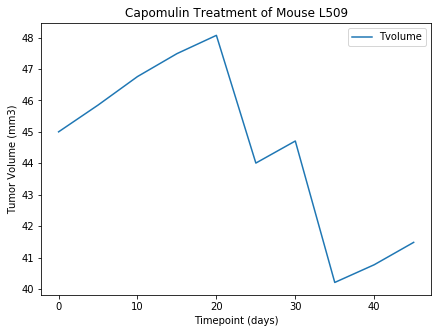

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = cd[cd.drug == 'Capomulin']
capomulinl509 = cd[cd.id == 'l509']
t_vol = capomulinl509[['t', 'Tvolume']]
t_vol.set_index('t', inplace=True)
t_vol = t_vol.plot(kind='line', title='Capomulin Treatment of Mouse L509', figsize=(7,5))
t_vol.set_xlabel('Timepoint (days)')
t_vol.set_ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

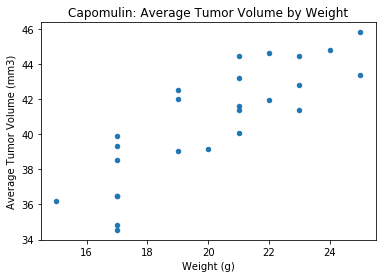

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
w_vol = capomulin.groupby('id')[['grams', 'Tvolume']].mean()
scatter = w_vol.plot(kind='scatter', x='grams', y='Tvolume', title='Capomulin: Average Tumor Volume by Weight', figsize=(6,4))
scatter.set_xlabel('Weight (g)')
scatter.set_ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"There is a positive relationship between weight and average tumor volume: r = {sts.pearsonr(w_vol.grams, w_vol.Tvolume)[0]:.2f}.")

There is a positive relationship between weight and average tumor volume: r = 0.84.


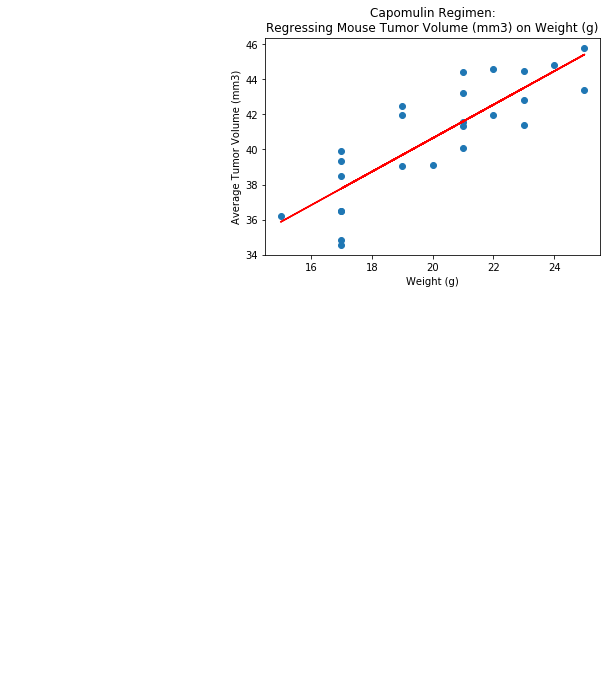

In [20]:
x = w_vol.grams
y = w_vol.Tvolume

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Regimen:\nRegressing Mouse Tumor Volume (mm3) on Weight (g)')
plt.show()